In [1]:
import io
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"C:\Users\girir\Downloads\Telco_customer_churn.csv")
print("Number of rows:", len(data))
data.info()

Number of rows: 7043
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Int

# Data Preparation

Check null values

In [4]:
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

Drop Columns

In [5]:
data.drop(columns=['Churn Reason'], inplace = True)

## Save customer ID
df_id = data['CustomerID']
# Drop column
data.drop(columns=['CustomerID'], inplace=True)
data.drop(columns=['Churn Value','Churn Score'], inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Lat Long           7043 non-null   object 
 6   Latitude           7043 non-null   float64
 7   Longitude          7043 non-null   float64
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Security    7043 

Change Total Charges type to float

In [7]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce').fillna(0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Lat Long           7043 non-null   object 
 6   Latitude           7043 non-null   float64
 7   Longitude          7043 non-null   float64
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Security    7043 

# Exploratory Data Analysis (EDA)

In [9]:
import plotly.express as px

Customer per Churn Label

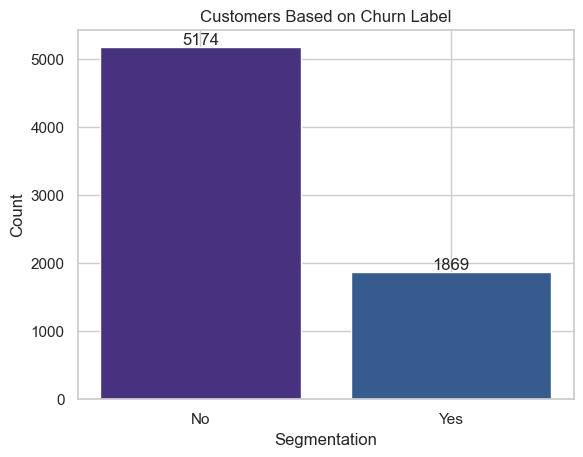

In [10]:
pallet = sns.color_palette("viridis")

segment_counts = data['Churn Label'].value_counts()

# Plotting using matplotlib
sns.set(style = 'whitegrid')
plt.figure()
bars = plt.bar(segment_counts.index, segment_counts.values, color=pallet)

# Adding labels and title
plt.xlabel('Segmentation')
plt.ylabel('Count')
plt.title('Customers Based on Churn Label')

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

# Show the plot
plt.show()

Mapping customer location

In [14]:
# Assuming you have latitude, longitude, and churn columns in your DataFrame df
# Replace 'df' with your actual DataFrame name

fig = px.scatter_geo(
    data,
    lat='Latitude',
    lon='Longitude',
    color='Churn Label',
    color_discrete_map={0: 'green', 1: 'red'},
    size_max=10,
    opacity=0.7,
    projection='natural earth',
    title='Churn Visualization on Map'
)

fig.show()

Gender by Churn

C:\Users\girir\AppData\Local\Temp\ipykernel_29724\3970669500.py:2: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.



<Axes: xlabel='Gender', ylabel='count'>

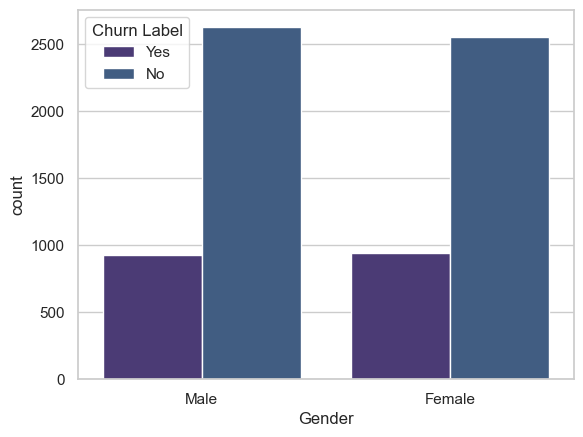

In [15]:
sns.set(style="whitegrid")
sns.countplot(x='Gender', hue="Churn Label", data=data, palette=pallet, edgecolor = 'white', order=data['Gender'].value_counts().index)

Senior Citizen by Churn

C:\Users\girir\AppData\Local\Temp\ipykernel_29724\4001680862.py:1: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.



<Axes: xlabel='Senior Citizen', ylabel='count'>

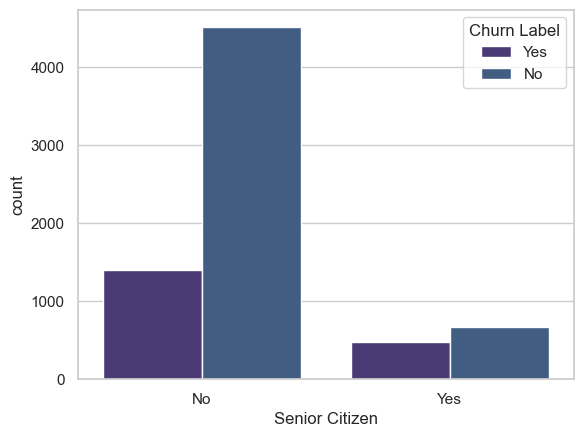

In [16]:
sns.countplot(x='Senior Citizen', hue="Churn Label", data=data, palette=pallet, edgecolor = 'white', order=data['Senior Citizen'].value_counts().index)

Contract by Churn

C:\Users\girir\AppData\Local\Temp\ipykernel_29724\4004068397.py:1: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.



<Axes: xlabel='Contract', ylabel='count'>

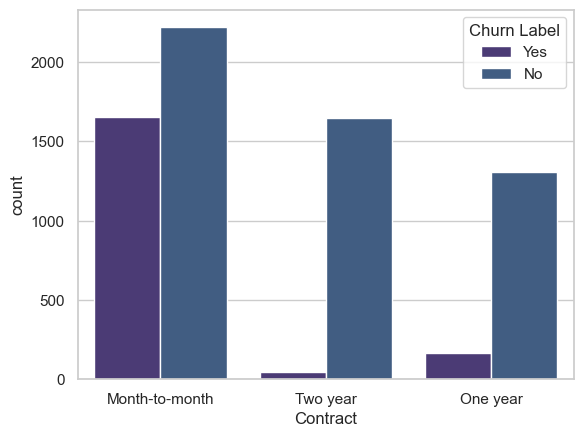

In [17]:
sns.countplot(x='Contract', hue="Churn Label", data=data, palette=pallet, edgecolor = 'white', order=data['Contract'].value_counts().index)

Dependents by Churn

C:\Users\girir\AppData\Local\Temp\ipykernel_29724\3116136871.py:1: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.



<Axes: xlabel='Dependents', ylabel='count'>

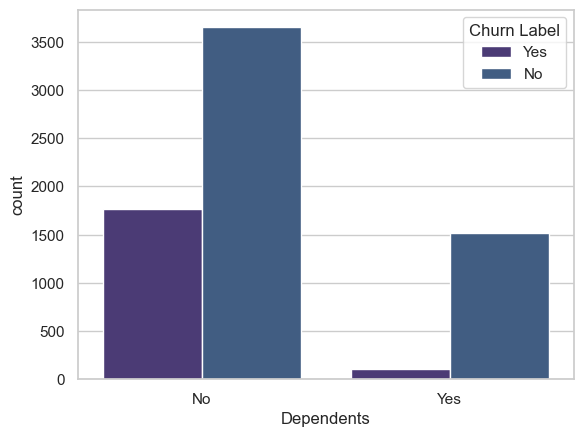

In [18]:
sns.countplot(x='Dependents', hue="Churn Label", data=data, palette=pallet, edgecolor = 'white', order=data['Dependents'].value_counts().index)

Monthly Charges per Churn

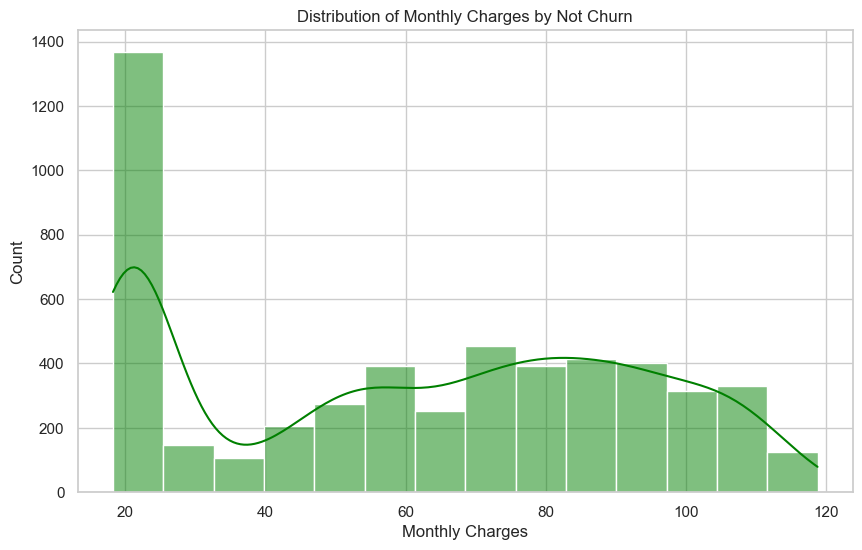

In [20]:
plt.figure(figsize=(10, 6))

# Plotting using Seaborn histplot with counts per monthly charges
ax = sns.histplot(data['Monthly Charges'][data["Churn Label"] == 'No'], color="green", label="Not Churn", kde=True)

ax.set_ylabel('Count')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Not Churn')

plt.show()

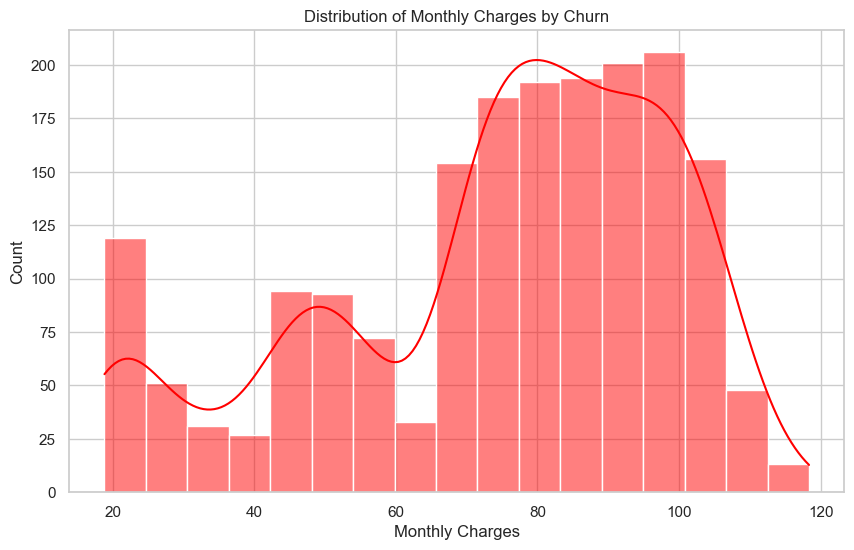

In [23]:
plt.figure(figsize=(10, 6))

# Plotting using Seaborn histplot with counts per monthly charges
ax = sns.histplot(data['Monthly Charges'][data["Churn Label"] == 'Yes'], color="red", label="Not Churn", kde=True)

ax.set_ylabel('Count')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

plt.show()

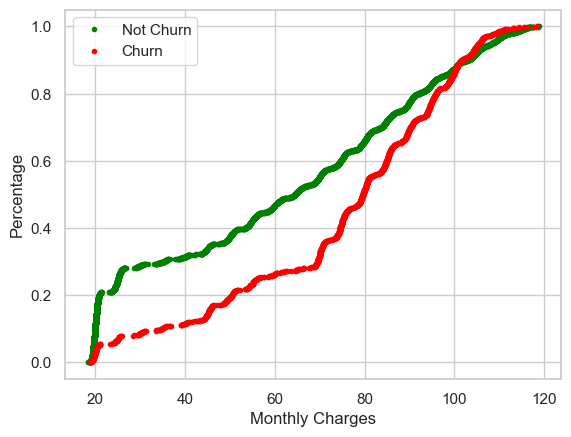

In [25]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x_churn_no, y_churn_no = ecdf(data['Monthly Charges'][data["Churn Label"] == 'No'])
x_churn_yes, y_churn_yes = ecdf(data['Monthly Charges'][data["Churn Label"] == 'Yes'])

plt.plot(x_churn_no, y_churn_no, marker='.', linestyle='none', label='Not Churn', color="green")
plt.plot(x_churn_yes, y_churn_yes, marker='.', linestyle='none', label='Churn', color = "red")
ax.legend(["Not Churn", "Churn"], loc='upper right')
plt.xlabel('Monthly Charges')
plt.ylabel('Percentage')
plt.legend()
plt.show()


Total Charges per Churn

In [26]:
data['Total Charges'].isnull().sum()

0

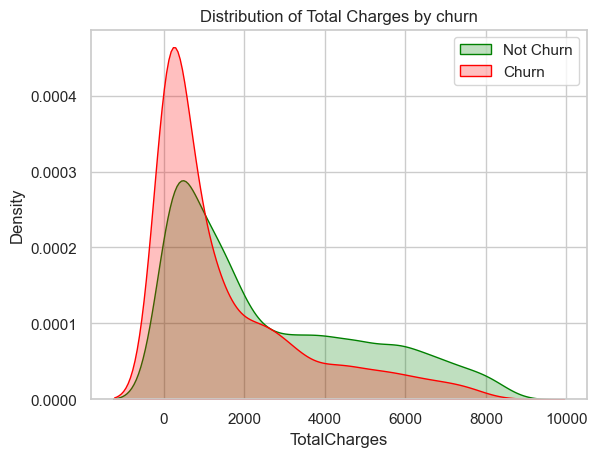

In [28]:
data['Total Charges']= data['Total Charges'].astype(float)

ax = sns.kdeplot(data['Total Charges'][data["Churn Label"] == 'No'], fill = True, color="green")
ax = sns.kdeplot(data['Total Charges'][data["Churn Label"] == 'Yes'],ax =ax,fill= True, color = "red")
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('TotalCharges')
ax.set_title('Distribution of Total Charges by churn');

Data Splitting

In [29]:
train_set = data.copy()

# Split the data into training and testing sets
train_set, test_set = train_test_split(data, test_size=0.2, stratify=data['Churn Label'],random_state=42)

# Data split Train set and validation set
train_set, val_set = train_test_split(train_set, test_size=0.2, stratify=train_set['Churn Label'],random_state=42)

# Data Preprocessing

In [47]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4507 entries, 6718 to 6542
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              4507 non-null   int64  
 1   Country            4507 non-null   object 
 2   State              4507 non-null   object 
 3   City               4507 non-null   object 
 4   Zip Code           4507 non-null   int64  
 5   Lat Long           4507 non-null   object 
 6   Latitude           4507 non-null   float64
 7   Longitude          4507 non-null   float64
 8   Gender             4507 non-null   object 
 9   Senior Citizen     4507 non-null   object 
 10  Partner            4507 non-null   object 
 11  Dependents         4507 non-null   object 
 12  Tenure Months      4507 non-null   int64  
 13  Phone Service      4507 non-null   object 
 14  Multiple Lines     4507 non-null   object 
 15  Internet Service   4507 non-null   object 
 16  Online Security    4507 no

In [48]:
val_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1127 entries, 6409 to 6599
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              1127 non-null   int64  
 1   Country            1127 non-null   object 
 2   State              1127 non-null   object 
 3   City               1127 non-null   object 
 4   Zip Code           1127 non-null   int64  
 5   Lat Long           1127 non-null   object 
 6   Latitude           1127 non-null   float64
 7   Longitude          1127 non-null   float64
 8   Gender             1127 non-null   object 
 9   Senior Citizen     1127 non-null   object 
 10  Partner            1127 non-null   object 
 11  Dependents         1127 non-null   object 
 12  Tenure Months      1127 non-null   int64  
 13  Phone Service      1127 non-null   object 
 14  Multiple Lines     1127 non-null   object 
 15  Internet Service   1127 non-null   object 
 16  Online Security    1127 no

In [49]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 2196 to 6000
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              1409 non-null   int64  
 1   Country            1409 non-null   object 
 2   State              1409 non-null   object 
 3   City               1409 non-null   object 
 4   Zip Code           1409 non-null   int64  
 5   Lat Long           1409 non-null   object 
 6   Latitude           1409 non-null   float64
 7   Longitude          1409 non-null   float64
 8   Gender             1409 non-null   object 
 9   Senior Citizen     1409 non-null   object 
 10  Partner            1409 non-null   object 
 11  Dependents         1409 non-null   object 
 12  Tenure Months      1409 non-null   int64  
 13  Phone Service      1409 non-null   object 
 14  Multiple Lines     1409 non-null   object 
 15  Internet Service   1409 non-null   object 
 16  Online Security    1409 no

In [50]:
def drop_feature(a):
    columns_to_drop = ['Count', 'Country', 'State', 'Zip Code', 'Lat Long', 'Longitude', 'Latitude', 'Partner']
    a = a.drop(columns=columns_to_drop, axis=1)
    return a

In [51]:
def city_feature(df):
    top_15_cities = df['City'].value_counts().head(15).index.tolist()
    
    def replace_city(city):
        return city if city in top_15_cities else 'Other'
    
    df['City'] = df['City'].apply(replace_city)
    
    return df

In [52]:
def OHE(df, exclude_col=None):
    df_encoded = df.copy()
    
    cols_to_encode = df.select_dtypes(include=['object']).columns
    cols_to_exclude = exclude_col if exclude_col else []

    for col in cols_to_encode:
        if col not in cols_to_exclude:
            df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded[col], prefix=col)], axis=1)
            df_encoded.drop(col, axis=1, inplace=True)
        
    return df_encoded

In [53]:
def labelling(df):
    column_mapping = {
        'Gender': {'Female': 1, 'Male': 0},
        'Dependents': {'Yes': 1, 'No': 0},
        'Phone Service': {'Yes': 1, 'No': 0},
        'Paperless Billing': {'Yes': 1, 'No': 0},
        'Senior Citizen': {'Yes': 1, 'No': 0}
    }
    df.replace(column_mapping, inplace=True)
    return df

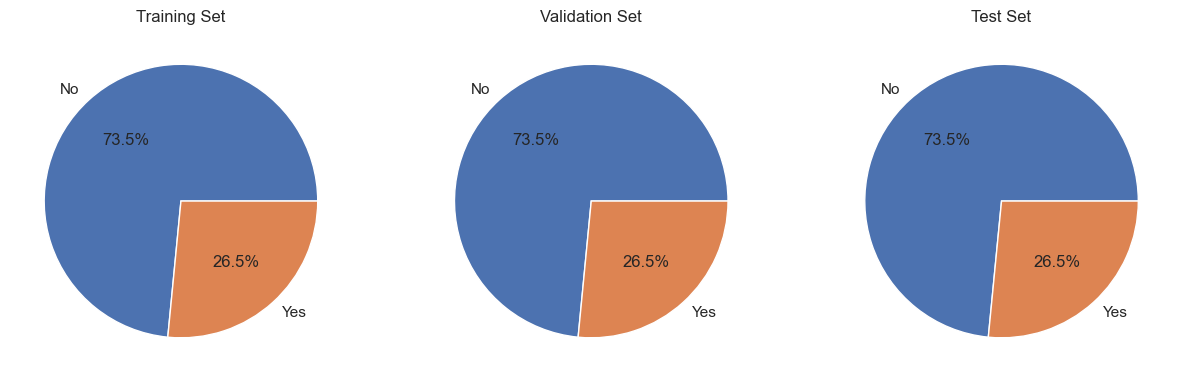

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot for the training set
train_counts = train_set['Churn Label'].value_counts()
axes[0].pie(x=train_counts, labels=['No', 'Yes'], autopct='%1.1f%%')
axes[0].set_title('Training Set')

# Plot for the validation set
val_counts = val_set['Churn Label'].value_counts()
axes[1].pie(x=val_counts, labels=['No', 'Yes'], autopct='%1.1f%%')
axes[1].set_title('Validation Set')

# Plot for the test set
test_counts = test_set['Churn Label'].value_counts()
axes[2].pie(x=test_counts, labels=['No', 'Yes'], autopct='%1.1f%%')
axes[2].set_title('Test Set')

plt.show()

Prepare Training and Validation Set

In [56]:
train_set = drop_feature(train_set)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4507 entries, 6718 to 6542
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               4507 non-null   object 
 1   Gender             4507 non-null   object 
 2   Senior Citizen     4507 non-null   object 
 3   Dependents         4507 non-null   object 
 4   Tenure Months      4507 non-null   int64  
 5   Phone Service      4507 non-null   object 
 6   Multiple Lines     4507 non-null   object 
 7   Internet Service   4507 non-null   object 
 8   Online Security    4507 non-null   object 
 9   Online Backup      4507 non-null   object 
 10  Device Protection  4507 non-null   object 
 11  Tech Support       4507 non-null   object 
 12  Streaming TV       4507 non-null   object 
 13  Streaming Movies   4507 non-null   object 
 14  Contract           4507 non-null   object 
 15  Paperless Billing  4507 non-null   object 
 16  Payment Method     4507 no

In [57]:
train_set = labelling(train_set)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4507 entries, 6718 to 6542
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               4507 non-null   object 
 1   Gender             4507 non-null   int64  
 2   Senior Citizen     4507 non-null   int64  
 3   Dependents         4507 non-null   int64  
 4   Tenure Months      4507 non-null   int64  
 5   Phone Service      4507 non-null   int64  
 6   Multiple Lines     4507 non-null   object 
 7   Internet Service   4507 non-null   object 
 8   Online Security    4507 non-null   object 
 9   Online Backup      4507 non-null   object 
 10  Device Protection  4507 non-null   object 
 11  Tech Support       4507 non-null   object 
 12  Streaming TV       4507 non-null   object 
 13  Streaming Movies   4507 non-null   object 
 14  Contract           4507 non-null   object 
 15  Paperless Billing  4507 non-null   int64  
 16  Payment Method     4507 no

In [58]:
train_set = city_feature(train_set)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4507 entries, 6718 to 6542
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               4507 non-null   object 
 1   Gender             4507 non-null   int64  
 2   Senior Citizen     4507 non-null   int64  
 3   Dependents         4507 non-null   int64  
 4   Tenure Months      4507 non-null   int64  
 5   Phone Service      4507 non-null   int64  
 6   Multiple Lines     4507 non-null   object 
 7   Internet Service   4507 non-null   object 
 8   Online Security    4507 non-null   object 
 9   Online Backup      4507 non-null   object 
 10  Device Protection  4507 non-null   object 
 11  Tech Support       4507 non-null   object 
 12  Streaming TV       4507 non-null   object 
 13  Streaming Movies   4507 non-null   object 
 14  Contract           4507 non-null   object 
 15  Paperless Billing  4507 non-null   int64  
 16  Payment Method     4507 no

In [59]:
col_excluded = ['Churn Label','Gender', 'Senior Citizen', 'Dependents', 'Phone Service', 'Paperless Billing']
train_set = OHE(train_set,exclude_col=col_excluded)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4507 entries, 6718 to 6542
Data columns (total 57 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Gender                                    4507 non-null   int64  
 1   Senior Citizen                            4507 non-null   int64  
 2   Dependents                                4507 non-null   int64  
 3   Tenure Months                             4507 non-null   int64  
 4   Phone Service                             4507 non-null   int64  
 5   Paperless Billing                         4507 non-null   int64  
 6   Monthly Charges                           4507 non-null   float64
 7   Total Charges                             4507 non-null   float64
 8   Churn Label                               4507 non-null   object 
 9   CLTV                                      4507 non-null   int64  
 10  City_Bakersfield                      

In [60]:
val_set = drop_feature(val_set)
val_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1127 entries, 6409 to 6599
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               1127 non-null   object 
 1   Gender             1127 non-null   object 
 2   Senior Citizen     1127 non-null   object 
 3   Dependents         1127 non-null   object 
 4   Tenure Months      1127 non-null   int64  
 5   Phone Service      1127 non-null   object 
 6   Multiple Lines     1127 non-null   object 
 7   Internet Service   1127 non-null   object 
 8   Online Security    1127 non-null   object 
 9   Online Backup      1127 non-null   object 
 10  Device Protection  1127 non-null   object 
 11  Tech Support       1127 non-null   object 
 12  Streaming TV       1127 non-null   object 
 13  Streaming Movies   1127 non-null   object 
 14  Contract           1127 non-null   object 
 15  Paperless Billing  1127 non-null   object 
 16  Payment Method     1127 no

In [61]:
val_set = labelling(val_set)
val_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1127 entries, 6409 to 6599
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               1127 non-null   object 
 1   Gender             1127 non-null   int64  
 2   Senior Citizen     1127 non-null   int64  
 3   Dependents         1127 non-null   int64  
 4   Tenure Months      1127 non-null   int64  
 5   Phone Service      1127 non-null   int64  
 6   Multiple Lines     1127 non-null   object 
 7   Internet Service   1127 non-null   object 
 8   Online Security    1127 non-null   object 
 9   Online Backup      1127 non-null   object 
 10  Device Protection  1127 non-null   object 
 11  Tech Support       1127 non-null   object 
 12  Streaming TV       1127 non-null   object 
 13  Streaming Movies   1127 non-null   object 
 14  Contract           1127 non-null   object 
 15  Paperless Billing  1127 non-null   int64  
 16  Payment Method     1127 no

In [62]:
val_set = city_feature(val_set)
val_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1127 entries, 6409 to 6599
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               1127 non-null   object 
 1   Gender             1127 non-null   int64  
 2   Senior Citizen     1127 non-null   int64  
 3   Dependents         1127 non-null   int64  
 4   Tenure Months      1127 non-null   int64  
 5   Phone Service      1127 non-null   int64  
 6   Multiple Lines     1127 non-null   object 
 7   Internet Service   1127 non-null   object 
 8   Online Security    1127 non-null   object 
 9   Online Backup      1127 non-null   object 
 10  Device Protection  1127 non-null   object 
 11  Tech Support       1127 non-null   object 
 12  Streaming TV       1127 non-null   object 
 13  Streaming Movies   1127 non-null   object 
 14  Contract           1127 non-null   object 
 15  Paperless Billing  1127 non-null   int64  
 16  Payment Method     1127 no

In [63]:
col_excluded = ['Churn Label','Gender', 'Senior Citizen', 'Dependents', 'Phone Service', 'Paperless Billing']
val_set = OHE(val_set,exclude_col=col_excluded)
val_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1127 entries, 6409 to 6599
Data columns (total 57 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Gender                                    1127 non-null   int64  
 1   Senior Citizen                            1127 non-null   int64  
 2   Dependents                                1127 non-null   int64  
 3   Tenure Months                             1127 non-null   int64  
 4   Phone Service                             1127 non-null   int64  
 5   Paperless Billing                         1127 non-null   int64  
 6   Monthly Charges                           1127 non-null   float64
 7   Total Charges                             1127 non-null   float64
 8   Churn Label                               1127 non-null   object 
 9   CLTV                                      1127 non-null   int64  
 10  City_Berkeley                         

Matching the train set with validation set

In [64]:
def match_columns(train, test):
    # Get list of columns in training set
    train_cols = train.columns.tolist()
    
    # Get list of columns in test set
    test_cols = test.columns.tolist()
    
    # Remove any columns in test set that aren't in training set
    for col in test_cols:
        if col not in train_cols:
            test = test.drop(col, axis=1)
    
    # Add any missing columns to test set and fill with 0
    for col in train_cols:
        if col not in test_cols:
            test[col] = 0
    
    # Reorder columns in test set to match training set
    test = test[train_cols]
    
    # Return modified test set
    return test

In [65]:
# Match the columns
val_set = match_columns(train_set, val_set)

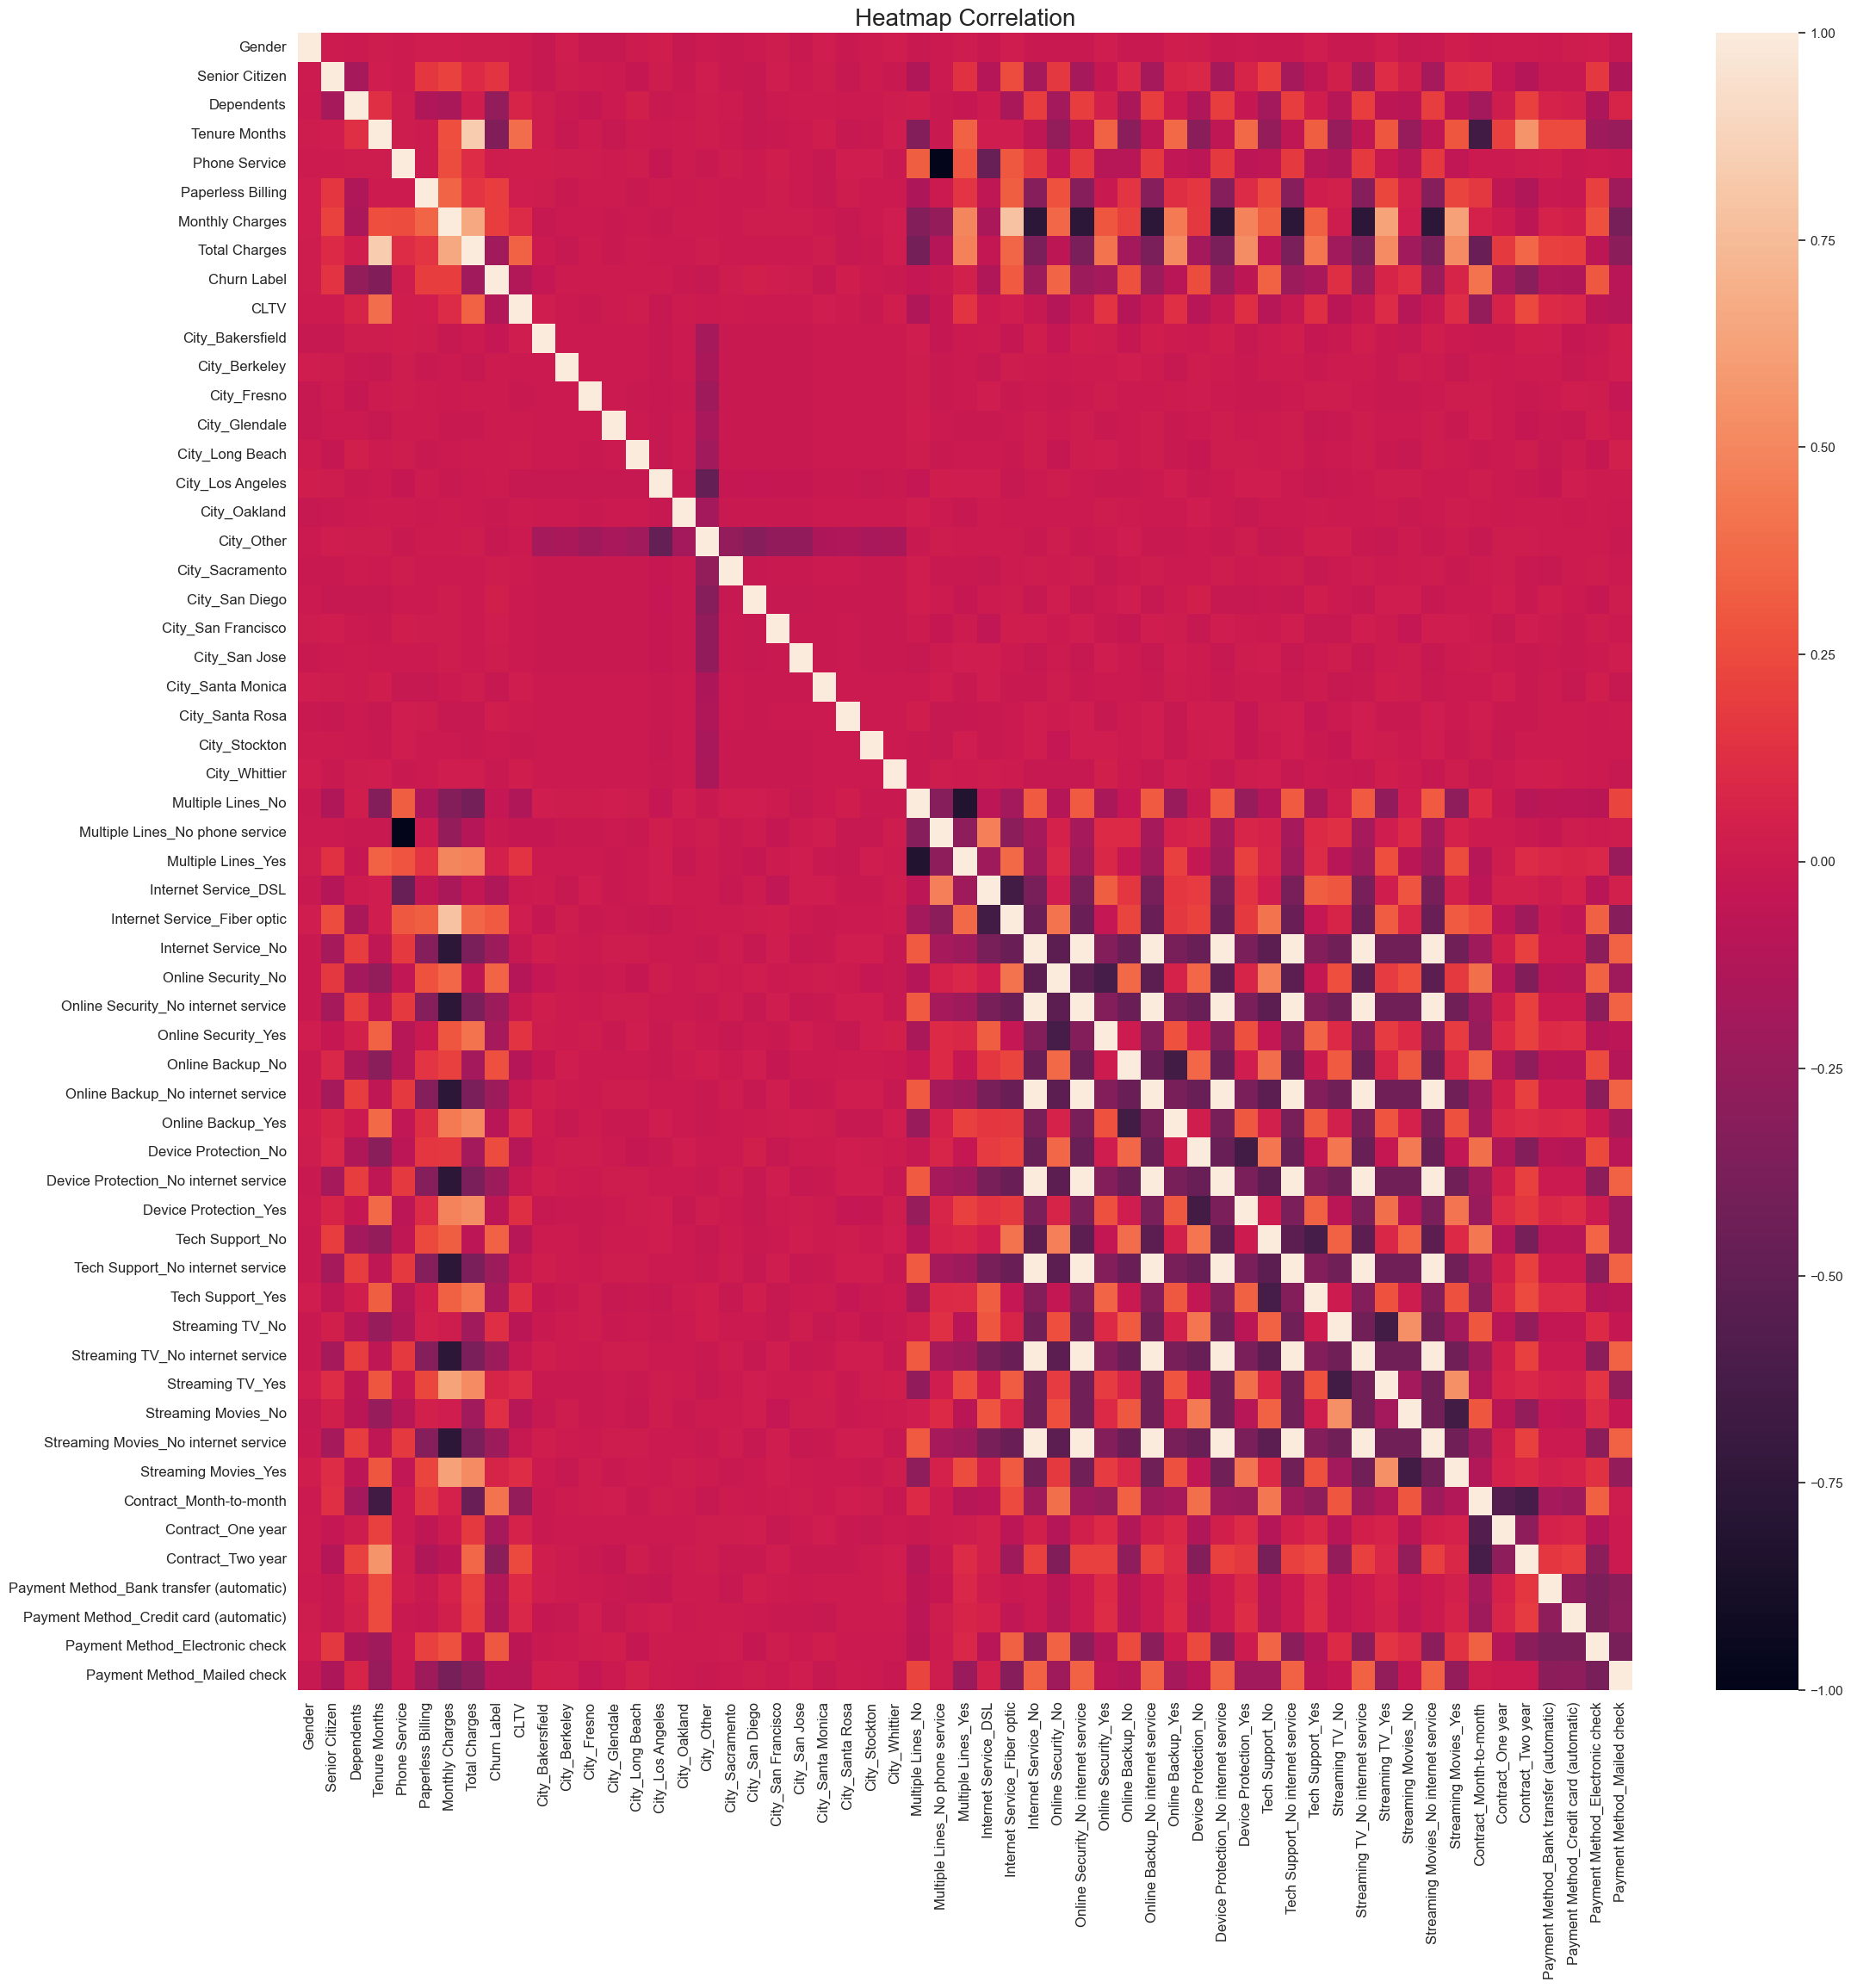

In [66]:
train_set_c = train_set.copy()
train_set_c['Churn Label'] = train_set_c['Churn Label'].map({'Yes': 1, 'No': 0})

fig, ax = plt.subplots(1, figsize=(25,25))
sns.heatmap(train_set_c.corr(), fmt=",.2f")
plt.title("Heatmap Correlation", fontsize=20)
plt.tick_params(labelsize=12)

In [67]:
#Split predictor and target variable for train set
X_train = train_set.drop(['Churn Label'], axis=1)
y_train = train_set['Churn Label']

In [68]:
#Split predictor and target variable for validation set
X_val = val_set.drop(['Churn Label'], axis=1)
y_val = val_set['Churn Label']

# Modelling

1. Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [70]:
def train_decision_tree(X_train, X_val, y_train, criterion, max_depth, min_samples_leaf):
    # Creating the classifier object
    clf = DecisionTreeClassifier(criterion=criterion, random_state=100, max_depth=max_depth, min_samples_leaf=min_samples_leaf)

    # Performing training
    clf.fit(X_train, y_train)
    return clf

In [72]:
#Predict values
y_pred_gini = clf_gini.predict(X_val)
y_pred_train_gini = clf_gini.predict(X_train)

print("Train set: {0:0.4f}".format(accuracy_score(y_train, y_pred_train_gini)))
print("Test set: {0:0.4f}".format(accuracy_score(y_val, y_pred_gini)))

Train set: 0.7897
Test set: 0.7986


In [73]:
from sklearn.metrics import classification_report

print(f"{clf_gini.__class__.__name__} Training Set Score")
print()
print(classification_report(y_pred_train_gini, y_train))

DecisionTreeClassifier Training Set Score

              precision    recall  f1-score   support

          No       0.94      0.80      0.87      3891
         Yes       0.36      0.70      0.48       616

    accuracy                           0.79      4507
   macro avg       0.65      0.75      0.67      4507
weighted avg       0.86      0.79      0.81      4507



In [74]:
print(f"{clf_gini.__class__.__name__} Validation Set Score")
print()
print(classification_report(y_val, y_pred_gini))

DecisionTreeClassifier Validation Set Score

              precision    recall  f1-score   support

          No       0.81      0.96      0.87       828
         Yes       0.75      0.36      0.49       299

    accuracy                           0.80      1127
   macro avg       0.78      0.66      0.68      1127
weighted avg       0.79      0.80      0.77      1127



# Evaluate Model

Cross Validation

In [81]:
from xgboost import XGBClassifier

In [82]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.fit_transform(y_val)

def xgb_clf(X,y):
    xgb_classifier = XGBClassifier(n_estimators=100, tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
    classifier = xgb_classifier.fit(X, y)
    return classifier
clf_xgb = xgb_clf(X_train,y_train_encoded)

In [83]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(X, y, average, **params):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Define the XGBClassifier with specified parameters
    clf = XGBClassifier(**params)

    # Define scoring functions
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average=average),
        'recall': make_scorer(recall_score, average=average),
        'f1': make_scorer(f1_score, average=average)
    }

    # Perform cross-validation
    results = cross_validate(clf, X, y, cv=cv, scoring=scoring)

    # Display results
    for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
        print(f"{metric.split('_')[1].capitalize()}:")
        for result in results[metric]:
            print(result)
        print(f"Average {metric.split('_')[1].capitalize()}: {results[metric].mean()}")
        print()

# Example usage:
evaluate_model(X_train, y_train_encoded, average='binary', n_estimators=100, max_depth=3, learning_rate=0.1)

Accuracy:
0.811529933481153
0.7915742793791575
0.8179800221975583
0.7913429522752498
0.8057713651498335
Average Accuracy: 0.8036397104965903

Precision:
0.6619718309859155
0.6444444444444445
0.6794258373205742
0.6186046511627907
0.6495327102803738
Average Precision: 0.6507958948388197

Recall:
0.5899581589958159
0.48333333333333334
0.5941422594142259
0.5564853556485355
0.5815899581589958
Average Recall: 0.5611018131101813

F1:
0.6238938053097346
0.5523809523809524
0.6339285714285713
0.5859030837004405
0.6136865342163356
Average F1: 0.6019585894072068

